* For this activity, we have examined a dataset containing nutritional information pertaining to the food and drink menu items at Starbucks.
* We are predicting the calorie values based on other features such as fat, carbs, fiber, and protein.
* We have used multiple linear regression to predict traget variable.






In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn import preprocessing
# from sklearn.model_selection import KFold

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/My Data files/Data/starbuck_calories.csv")

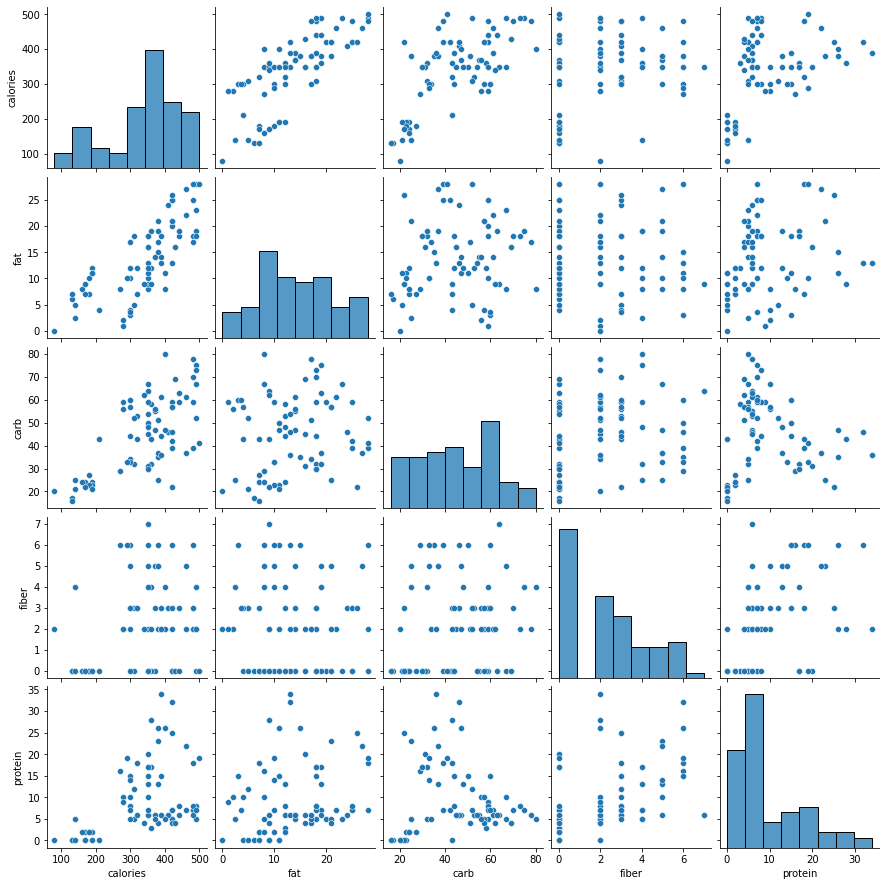

In [ ]:
data.head()
sb.pairplot(data)

##Finding corelation to see the relationship between features

  Fiber is having very low corlation with calories so we can eliminate this feature.

In [ ]:
data.corr()

,calories,fat,carb,fiber,protein
calories,1.000000,0.758682,0.674999,0.260645,0.410398
fat,0.758682,1.000000,0.144547,-0.028549,0.223470
carb,0.674999,0.144547,1.000000,0.213044,-0.050789
fiber,0.260645,-0.028549,0.213044,1.000000,0.488564
protein,0.410398,0.223470,-0.050789,0.488564,1.000000


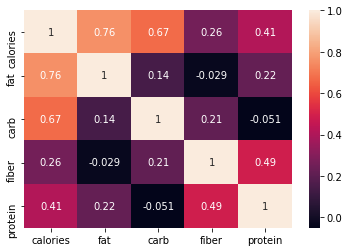

In [ ]:
ax = sb.heatmap(data.corr(), annot=True)

##Using Onehot encoding to convert string data to numbers

In [ ]:
def encoding_onehot(data):
  enc = OneHotEncoder()
  enc_data = pd.DataFrame(enc.fit_transform(data[["type"]]).toarray(),index = data.index)
  enc_data.columns = enc.get_feature_names()
  data = data.join([enc_data])
  return data

data = encoding_onehot(data)
data.drop(["item","type"],axis=1,inplace = True)
print(data.head())

   calories   fat  carb  fiber  ...  x0_parfait  x0_petite  x0_salad  x0_sandwich
0       350   8.0    67      5  ...         0.0        0.0       0.0          0.0
1       350   9.0    64      7  ...         0.0        0.0       0.0          0.0
2       420  20.0    59      0  ...         0.0        0.0       0.0          0.0
3       490  19.0    75      4  ...         0.0        0.0       0.0          0.0
4       130   6.0    17      0  ...         0.0        0.0       0.0          0.0

[5 rows x 12 columns]


In [ ]:
#Fiber was having low correlation with calories so we eliminated this feature.
x_data = data.loc[:,~data.columns.isin(["calories","fiber"])]
y_data = data["calories"]



##Splitting data into training and testing data and fitting linear regression model and calculating accuracy for the testing data.


In [ ]:
# Splitting data into training and testing data
x_train, x_test,y_train,y_test =  train_test_split(x_data,y_data, test_size=0.2,random_state = 4)
estimators = []
# Scaling data between 0 and 1
estimators.append(('standardize', StandardScaler()))
estimators.append(('lra', LinearRegression()))
pipeline_lr = Pipeline(estimators)
model = pipeline_lr.fit(x_train, y_train)
y_predict = model.predict(x_test)
# print(y_predict)
# print(y_test)
print(r2_score(y_test,y_predict))

0.9808801862716873


##Plotting actual and predicted calories though scatter plot

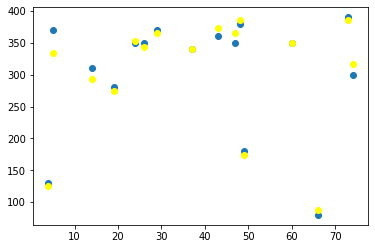

In [ ]:
# Plotted actual and predicted calories though scatter plot

plt.scatter(x= y_test.index,y=y_test, label = "cyxsdf")
plt.scatter(x= y_test.index,y=y_predict,color = "yellow", label = "cyx")

plt.show()